<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-dataset" data-toc-modified-id="Preparing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing the dataset</a></span><ul class="toc-item"><li><span><a href="#Subsetting-only-residential-data" data-toc-modified-id="Subsetting-only-residential-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Subsetting only residential data</a></span></li><li><span><a href="#Dropping-NaNs" data-toc-modified-id="Dropping-NaNs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dropping NaNs</a></span></li><li><span><a href="#Modifying-variables" data-toc-modified-id="Modifying-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modifying variables</a></span></li></ul></li><li><span><a href="#Cleaning-and-Initial-EDA" data-toc-modified-id="Cleaning-and-Initial-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning and Initial EDA</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dealing with outliers</a></span></li><li><span><a href="#Converting-categorical-variables-to-dummies" data-toc-modified-id="Converting-categorical-variables-to-dummies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Converting categorical variables to dummies</a></span></li></ul></li><li><span><a href="#EDA-and-feature-engineering" data-toc-modified-id="EDA-and-feature-engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and feature engineering</a></span></li><li><span><a href="#Building-an-initial-model" data-toc-modified-id="Building-an-initial-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building an initial model</a></span></li><li><span><a href="#Revising-the-model" data-toc-modified-id="Revising-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Revising the model</a></span><ul class="toc-item"><li><span><a href="#Removing-variables-with-p-values-&gt;-0.05" data-toc-modified-id="Removing-variables-with-p-values->-0.05-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Removing variables with p-values &gt; 0.05</a></span></li><li><span><a href="#Addressing-multicollinearity" data-toc-modified-id="Addressing-multicollinearity-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Addressing multicollinearity</a></span></li><li><span><a href="#Removing-high-collinearity-categorical-features" data-toc-modified-id="Removing-high-collinearity-categorical-features-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Removing high-collinearity categorical features</a></span></li></ul></li><li><span><a href="#Exploring-interactions" data-toc-modified-id="Exploring-interactions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploring interactions</a></span></li><li><span><a href="#Adding-Lasso,-Ridge-and-ElasticNet-models" data-toc-modified-id="Adding-Lasso,-Ridge-and-ElasticNet-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Adding Lasso, Ridge and ElasticNet models</a></span></li><li><span><a href="#Comparing-all-linear-regression-models" data-toc-modified-id="Comparing-all-linear-regression-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparing all linear regression models</a></span></li><li><span><a href="#Fine-tuning-LassoCV-model" data-toc-modified-id="Fine-tuning-LassoCV-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Fine-tuning LassoCV model</a></span><ul class="toc-item"><li><span><a href="#Using-only-the-initial-9-features-using-the-LassoCV-regressor" data-toc-modified-id="Using-only-the-initial-9-features-using-the-LassoCV-regressor-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Using only the initial 9 features using the LassoCV regressor</a></span></li><li><span><a href="#Using-only-the-3-interaction-features-using-the-LassoCV-regressor" data-toc-modified-id="Using-only-the-3-interaction-features-using-the-LassoCV-regressor-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Using only the 3 interaction features using the LassoCV regressor</a></span></li><li><span><a href="#Using-all-unique-features-(9-initial-+-2-interaction-features)-using-the-LassoCV-regressor" data-toc-modified-id="Using-all-unique-features-(9-initial-+-2-interaction-features)-using-the-LassoCV-regressor-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Using all unique features (9 initial + 2 interaction features) using the LassoCV regressor</a></span></li><li><span><a href="#Isolating-ideal-feature-set-by-creating-models-on-every-combination-of-the-feature-set-with-more-than-5+-elements" data-toc-modified-id="Isolating-ideal-feature-set-by-creating-models-on-every-combination-of-the-feature-set-with-more-than-5+-elements-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Isolating ideal feature set by creating models on every combination of the feature-set with more than 5+ elements</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pd.set_option("display.max_rows", 100)
#pd.set_option("display.max_columns", 100)

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
raw = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
raw.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
#safe = raw.copy()

## Preparing the dataset

In [6]:
data = raw.copy()
data.shape

(1460, 81)

### Subsetting only residential data

We're only interested in the data that relates to residential zoning, completely finished dwellings, and involved a 'normal' sale.

In [7]:
data = data.loc[data['salecondition'] == 'Normal'] #normal sales
data = data.loc[data['mszoning'].isin(['FV', 'RH', 'RL', 'RP', 'RM'])] #residential zoning
data = data.loc[data['mssubclass'] != 45] #excludes unfinished housing
data = data.loc[data['housestyle'].isin(['1Story', '1.5Fin', '2Story', '2.5Fin', 'SFoyer', 'SLvl'])] 
        #exlcuded unfinished stories

data.shape

(1170, 81)

### Dropping NaNs

In [8]:
cols_to_be_dropped, rows_to_be_dropped = [], []

for v in data.columns:
    if data[v].isna().sum()/len(data) > 0.1:
        print(v, data[v].isna().sum()/len(data), "**")
        cols_to_be_dropped.append(v)
    elif data[v].isna().sum()/len(data) > 0:
        rows_to_be_dropped.append(v)
        print(v, data[v].isna().sum()/len(data))

lotfrontage 0.20085470085470086 **
alley 0.9435897435897436 **
masvnrtype 0.003418803418803419
masvnrarea 0.003418803418803419
bsmtqual 0.02735042735042735
bsmtcond 0.02735042735042735
bsmtexposure 0.028205128205128206
bsmtfintype1 0.02735042735042735
bsmtfintype2 0.028205128205128206
electrical 0.0008547008547008547
fireplacequ 0.4683760683760684 **
garagetype 0.04871794871794872
garageyrblt 0.04871794871794872
garagefinish 0.04871794871794872
garagequal 0.04871794871794872
garagecond 0.04871794871794872
poolqc 0.9974358974358974 **
fence 0.8008547008547009 **
miscfeature 0.9581196581196582 **


In [9]:
data.drop(columns = cols_to_be_dropped, inplace=True)
data.dropna(axis=0, inplace=True)
data.shape

(1080, 75)

### Modifying variables

We make initial changes:
* (BsmtFullBath, BsmtHalfBath) and (FullBath, HalfBath) will be combined to BsmtBaths and Baths respectively, which are then changed into categorical variables
* YearBuilt, YearRemodAdd, GarageYrBlt will be used to create new variables that measure years since today (2019) 
* Fireplaces and garagecars will be made a categorical variable


In [10]:
data['bsmtbath'] = data['bsmtfullbath'] + data['bsmthalfbath']/2
data['bath'] = data['fullbath'] + data['halfbath']/2

data['time_since_house_built'] = 2019 - data['yearbuilt']
data['time_since_house_remod'] = 2019 - data['yearremodadd']
data['time_since_gar_built'] = 2019 - data['garageyrblt']

data['bsmtbath'] = data['bsmtbath'].astype('str')
data['bath'] = data['bsmtbath'].astype('str')
data['fireplaces'] = data['fireplaces'].astype('str')
data['garagecars'] = data['garagecars'].astype('str')

cols_to_be_removed = ['bsmtfullbath', 'bsmthalfbath', 'yearbuilt',
                    'fullbath', 'halfbath', 'yearremodadd', 'garageyrblt']
cols_to_be_added = ['bsmtbath', 'bath', 'time_since_house_built', 'time_since_house_remod', 'time_since_gar_built']

data.drop(columns=cols_to_be_removed, inplace = True)

In [11]:
x_vars = list(data.columns)
x_vars.remove('saleprice')

x_numerics, x_categorical = [], []

for v in x_vars:
    if (data[v].dtype.name == 'int64' or data[v].dtype.name == 'float64') and v != 'id':
        x_numerics.append(v)
    elif v!= 'id':
        x_categorical.append(v)

## Cleaning and Initial EDA

### Dealing with outliers

We start by plotting histograms of the different continuous variables.

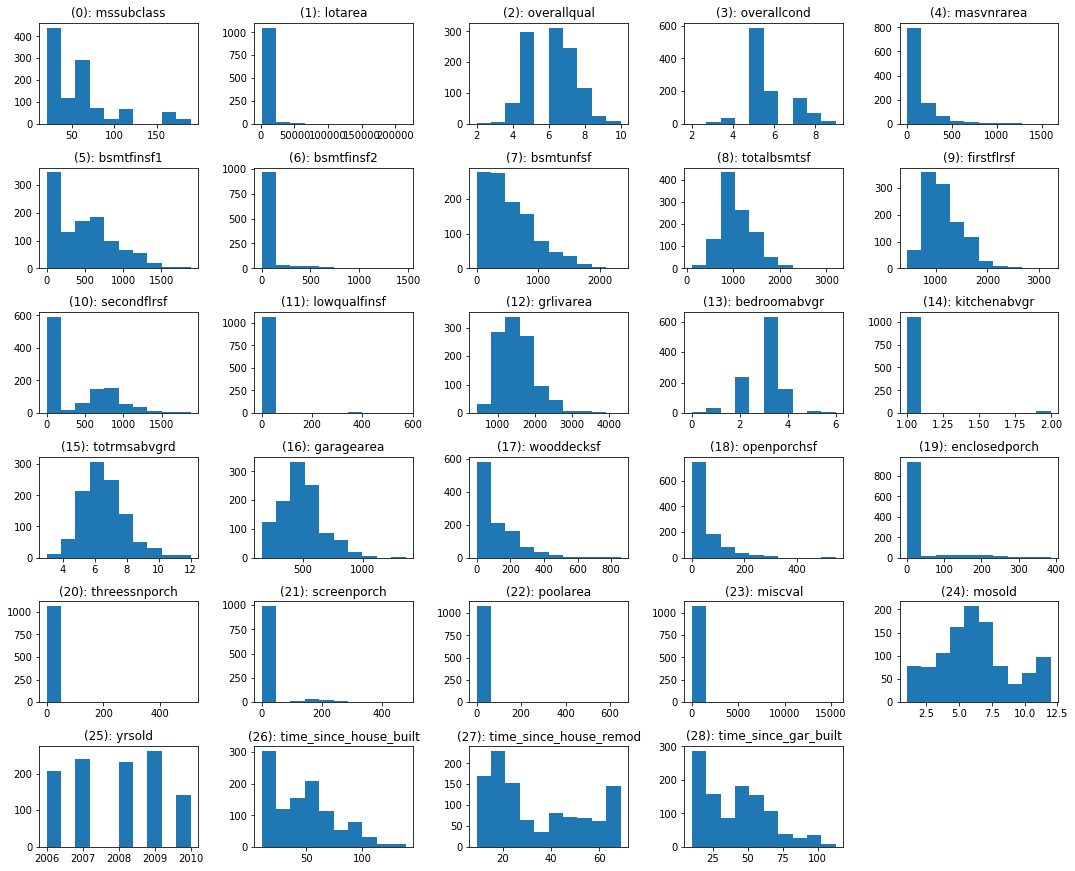

In [12]:
plt.figure(figsize=(15, 20))

for index, v in enumerate(x_numerics):
    plt.subplot(10, 5, index + 1)
    plt.hist(data[v])
    plt.title("({}): {}".format(index, v))

plt.tight_layout()
plt.show()

We see that `lotfrontage`, `lotarea`, `masvrnarea`, `bstmtfins1`, `bsmtfinsf2`, `totalbsmtsf`, `lowqualfinsf`, `screenporch`, `poolarea`, `miscval` and `screenporch` are heavily left-skewed. We look at the box plots for more information.

My hypothesis is that houses in the 'Residential Low Density' zoning category (aka, estates and spread-out houses) are contributing to the outliers.

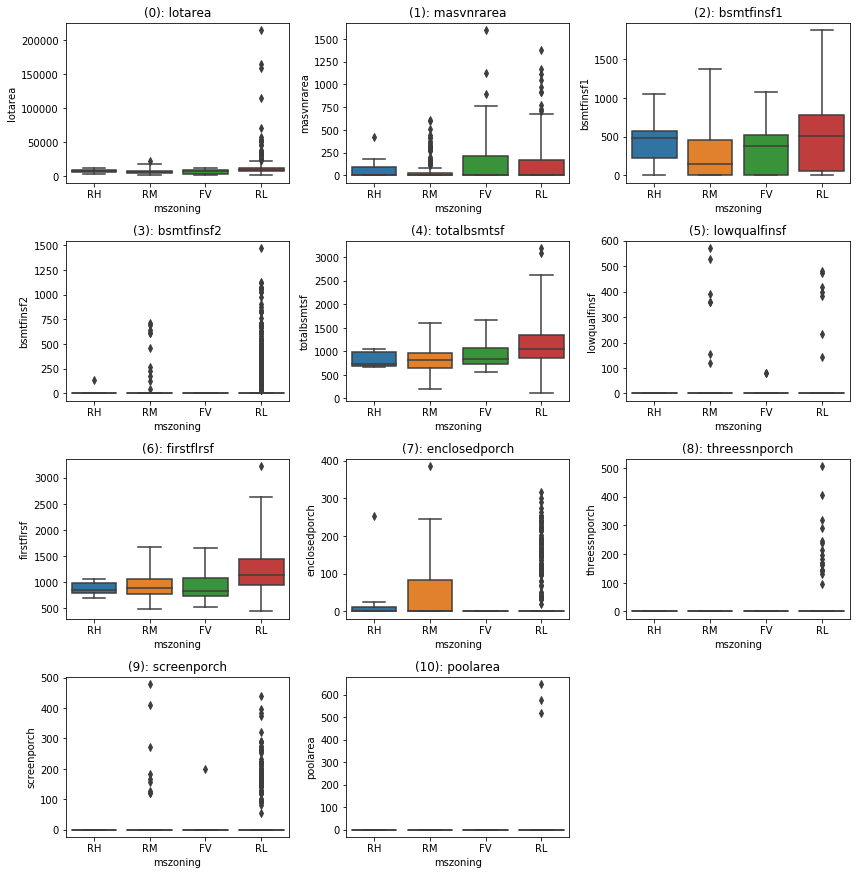

In [13]:
outlier_cols = ['lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'totalbsmtsf', 'lowqualfinsf', 
                'firstflrsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea']

plt.figure(figsize=(12, 30))

for index, c in enumerate(outlier_cols):
    plt.subplot(10, 3, index + 1)
    sns.boxplot(data = data, x = 'mszoning', y = c, order = ['RH', 'RM', 'FV', 'RL'], whis=3)
    plt.title("({}): {}".format(index, c))

plt.tight_layout()

As suspected, our hypothesis is somewhat true. Houses built in the Low Density zones have (understandably) extremely large lotareas. Unfortunately there isn't a way to tell if these outlying values are accurate. As such, we must remove outliers outside the [2, 98] percentile maintain data validity and still accommodate for high-value homes. 

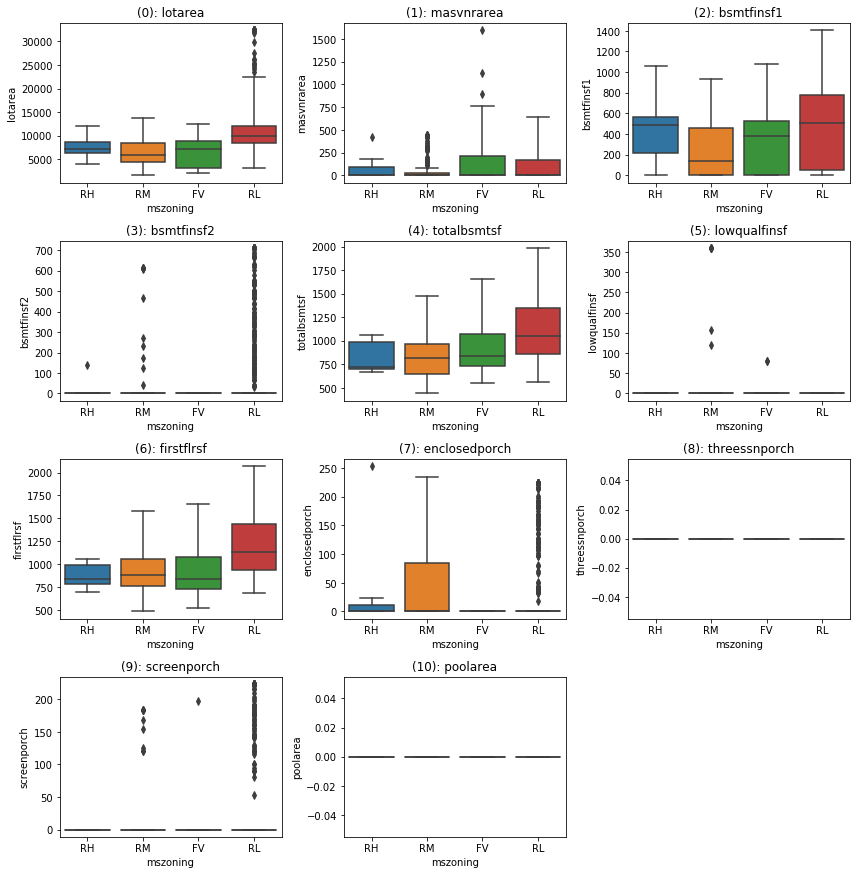

In [14]:
from scipy.stats.mstats import winsorize

data2 = data.copy()

plt.figure(figsize=(12, 30))
for index, c in enumerate(outlier_cols):
    
    for zone in data['mszoning'].unique():
        data2[c].loc[data['mszoning'] == zone] = winsorize(data[c].loc[data['mszoning'] == zone], (.02, .02))
    
    plt.subplot(10, 3, index + 1)
    sns.boxplot(data = data2, x = 'mszoning', y = c, order = ['RH', 'RM', 'FV', 'RL'], whis=3)
    plt.title("({}): {}".format(index, c))

plt.tight_layout()

In [15]:
data2['lowqualfinsf'].mean(), data2['poolarea'].mean(), data2['threessnporch'].mean()

(2.0703703703703704, 0.0, 0.0)

In [16]:
data['lowqualfinsf'].mean(), data['poolarea'].mean(), data['threessnporch'].mean()

(4.7935185185185185, 1.613888888888889, 3.475925925925926)

These are workable results. It appears that poolarea and threessonporch have near 0 values. We drop them.

In [17]:
data2.drop(columns=['poolarea', 'threessnporch'], inplace=True)
x_numerics.remove('poolarea')
x_numerics.remove('threessnporch')

### Converting categorical variables to dummies

In [18]:
cat = pd.DataFrame()

x_categorical_dummies = []

for c in x_categorical:
    temp = pd.get_dummies(data2[c], drop_first=True, prefix=c)
    x_categorical_dummies += list(temp.columns)
    
    cat = pd.concat([cat, temp], axis=1)

data2 = pd.concat([data2, cat], axis=1)
data2.drop(columns = x_categorical, inplace = True)
data2.shape

(1080, 211)

## EDA and feature engineering

Since it is going to extremely time-consuming to look at 211 columns, we start by looking at the correlations of the numeric variables with target variable. We start with the numerical variables:

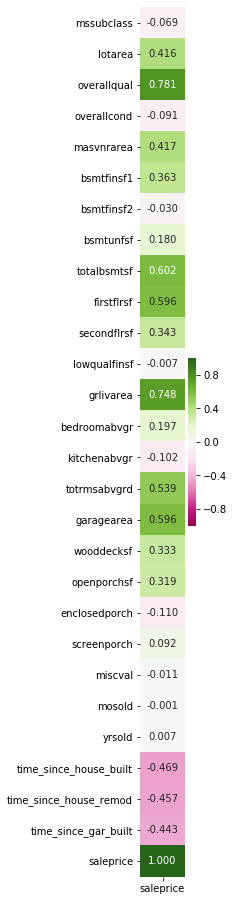

In [19]:
from numpy import tril

cols = x_numerics + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(1, 16))

ax = sns.heatmap(data2[cols].corr()['saleprice'].to_frame(), annot=True, fmt='.3f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1)

We start by looking at the distributions of the variables with a absolute correlation >= 0.50. As such, these have a relatively high correlation with the target variable, and might be possible explanatory features.

In [20]:
poss_features = []

corr = data2.corr()

for v in x_numerics:
    if abs(data2.corr()['saleprice'][v]) >= 0.5:
        poss_features.append(v)
        print("{}, corr: {}".format(v, data2.corr()['saleprice'][v]))
        
poss_features

overallqual, corr: 0.7814556315893234
totalbsmtsf, corr: 0.6019711038487187
firstflrsf, corr: 0.596466844807092
grlivarea, corr: 0.7484607034255527
totrmsabvgrd, corr: 0.5388600507212824
garagearea, corr: 0.5957705661297502


['overallqual',
 'totalbsmtsf',
 'firstflrsf',
 'grlivarea',
 'totrmsabvgrd',
 'garagearea']

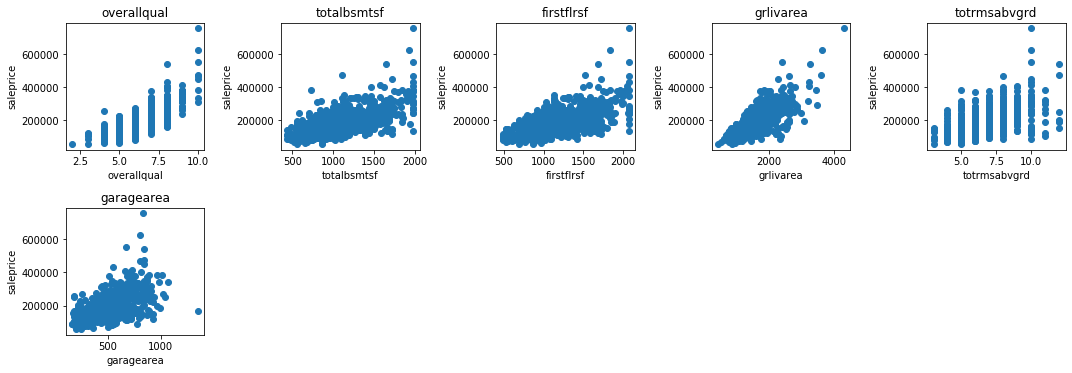

In [21]:
plt.figure(figsize=(15, 10))

for index, v in enumerate(poss_features):
    plt.subplot(4, 5, index + 1)
    plt.scatter(data2[v], data2['saleprice'])
    plt.xlabel(v)
    plt.ylabel('saleprice')
    plt.title(v)

plt.tight_layout()
plt.show()

We have our initial set of 15 explanatory numerical variables. We do the same with categorical variables.

In [22]:
for v in x_categorical_dummies:
    if abs(data2.corr()['saleprice'][v]) >= 0.5:
        poss_features.append(v)
        print("{}, corr: {} **".format(v, data2.corr()['saleprice'][v]))

exterqual_TA, corr: -0.5744876241281602 **
kitchenqual_TA, corr: -0.5182441426562464 **
garagecars_3, corr: 0.5759168004531827 **


In [23]:
initial_feats = poss_features.copy()

len(poss_features), poss_features

(9,
 ['overallqual',
  'totalbsmtsf',
  'firstflrsf',
  'grlivarea',
  'totrmsabvgrd',
  'garagearea',
  'exterqual_TA',
  'kitchenqual_TA',
  'garagecars_3'])

In [24]:
poss_features = initial_feats.copy()

We have our initial list of 9 explanatory variables.

## Building an initial model

In [25]:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

all_models = dict()


def model_checker(data, features, name = "", return_model=False, reg_type = "OLS", show_plot = True):
    """
        reg_type: 'OLS', 'lassoCV', 'ridgeCV' or 'elasticnetCV'

    """
    if name in all_models.keys():
        print('Enter new model name')
        return
    if name == "":
        name = "model_" + str(len(all_models) + 1)
   
    X = data[features]
    Y = data['saleprice']

    X = sm.add_constant(X)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, random_state=13, test_size=0.2)

    #print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    
    alphas = [10**e for e in range(1, 10)]

    if reg_type.lower() == 'lassocv':
        
        modelv1 = LassoCV(alphas=alphas, normalize = True)
        modelv1.fit(X_train, Y_train)
    elif reg_type.lower() == 'ridgecv':
        modelv1 = RidgeCV(alphas=alphas, normalize = True)
        modelv1.fit(X_train, Y_train)     
    elif reg_type.lower() == 'elasticnetcv':
        modelv1 = ElasticNetCV(alphas=alphas, l1_ratio=0.5, normalize = True)
        modelv1.fit(X_train, Y_train)
    else:
        modelv1 = sm.OLS(Y_train, X_train).fit()

    Y_pred = modelv1.predict(X_test)

    if show_plot:
        plt.scatter(Y_pred, Y_test)
        plt.plot(Y_test, Y_test, color="red")
        plt.xlabel('true values')
        plt.ylabel('predicted values')
        plt.show()


        print("Mean absolute error of the prediction is: {}".format(
            mean_absolute_error(Y_test, Y_pred)))
        print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_pred)))
        print("Root mean squared error of the prediction is: {}".format(
            rmse(Y_test, Y_pred)))
        print("Mean absolute percentage error of the prediction is: {}".format(
            np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100))
        print("")

    all_models[name] = {'name': name, 'features': features.copy(),
                        'regression_type': reg_type.lower(), 
                        'n_features': len(features),
                        'AIC': 0, 'BIC': 0,
                         'MAE': mean_absolute_error(Y_test, Y_pred),
                         'MSE': mse(Y_test, Y_pred),
                         'RMSE': rmse(Y_test, Y_pred),
                        'MAPE': np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100,
                        'adj_r_squared_train': 0, 'adj_r_squared_test': 0, 'alpha_param': 0,
                           'diff_in_adj_rsquared': 0            }

    if reg_type.lower() == 'ols':
        all_models[name]['adj_r_squared_train'] = modelv1.rsquared_adj
        all_models[name]['AIC'] = modelv1.aic
        all_models[name]['BIC'] = modelv1.bic
        all_models[name]['alpha_param'] = None
        
        if show_plot:
            print('***** results for model: ', name, "***** \n")
            print(modelv1.summary())
        
    else:
        all_models[name]['adj_r_squared_train'] = modelv1.score(X_train, Y_train)
        all_models[name]['adj_r_squared_test'] = modelv1.score(X_test, Y_test)
        all_models[name]['alpha_param'] = modelv1.alpha_
        all_models[name]['diff_in_adj_rsquared'] = abs(all_models[name]['adj_r_squared_train'] - all_models[name]['adj_r_squared_test'])
        
        #The line below only works for linear models
        #print(stats.coef_pval(modelv1, X_train, Y_train))
        if show_plot:
            print(all_models[name])
        
    
    if return_model:
        return modelv1
    else:
        return

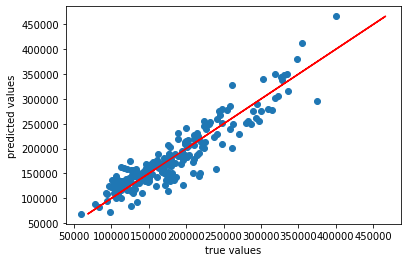

Mean absolute error of the prediction is: 19795.653096240716
Mean squared error of the prediction is: 649443036.164135
Root mean squared error of the prediction is: 25484.17226758866
Mean absolute percentage error of the prediction is: 11.695828219441301

***** results for model:  initial model ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     435.4
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          5.80e-312
Time:                        02:53:57   Log-Likelihood:                -10119.
No. Observations:                 864   AIC:                         2.026e+04
Df Residuals:                     854   BIC:                         2.031e+04
Df Model:                           9                           

In [26]:
model_checker(data2, poss_features, "initial model")

## Revising the model

### Removing variables with p-values > 0.05

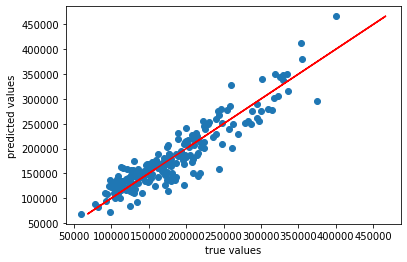

Mean absolute error of the prediction is: 19839.789862140315
Mean squared error of the prediction is: 655315071.8532389
Root mean squared error of the prediction is: 25599.122482093775
Mean absolute percentage error of the prediction is: 11.725701416140755

***** results for model:  model_2 ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     559.9
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          2.19e-314
Time:                        02:53:57   Log-Likelihood:                -10120.
No. Observations:                 864   AIC:                         2.026e+04
Df Residuals:                     856   BIC:                         2.029e+04
Df Model:                           7                               

In [27]:
poss_features.remove('firstflrsf')
poss_features.remove('exterqual_TA')

model_checker(data2, poss_features)

### Addressing multicollinearity

We start by looking at the correlation between the various feautures explore the issue:

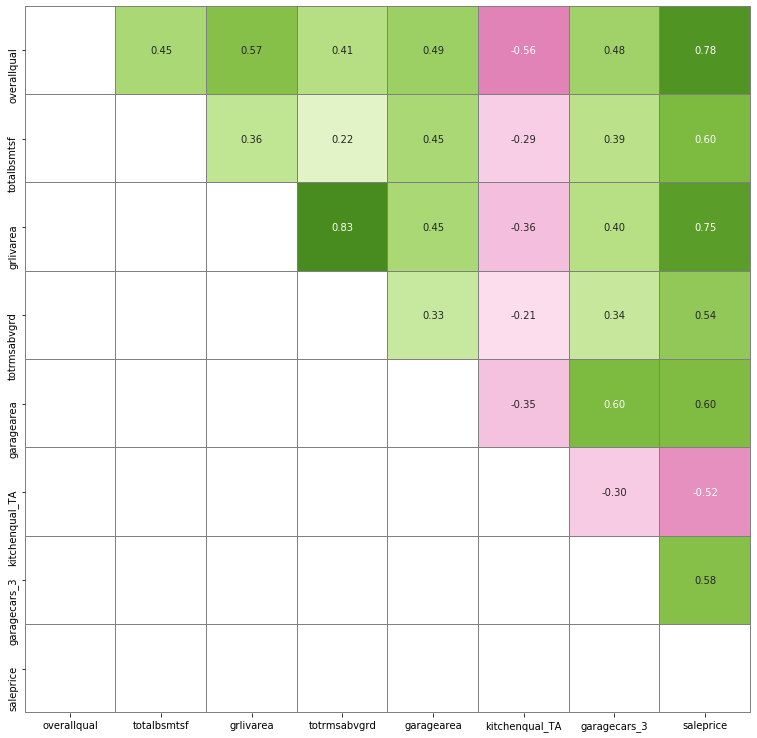

In [28]:
cols = poss_features + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(13, 13))

ax = sns.heatmap(data2[cols].corr(), annot=True, fmt='.2f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1, cbar = False, mask = matrix, 
                 linecolor='grey', linewidths=0.05)

### Removing high-collinearity categorical features

We can start out by removing the categorical variables that are dummies of the same category. We will pick the one with the higher absolute value correlation with 'saleprice'.

In [29]:
poss_features

['overallqual',
 'totalbsmtsf',
 'grlivarea',
 'totrmsabvgrd',
 'garagearea',
 'kitchenqual_TA',
 'garagecars_3']

In [30]:
poss_features.remove('totrmsabvgrd')
poss_features.remove('garagecars_3')
poss_features.remove('overallqual')
poss_features.remove('totalbsmtsf')

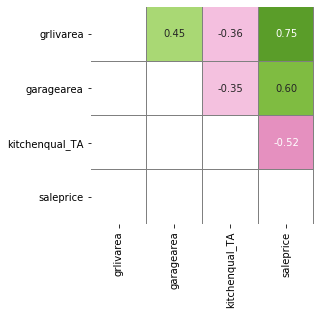

In [31]:
cols = poss_features + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(4, 4))

ax = sns.heatmap(data2[cols].corr(), annot=True, fmt='.2f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1, cbar = False, mask = matrix, 
                 linecolor='grey', linewidths=0.05)

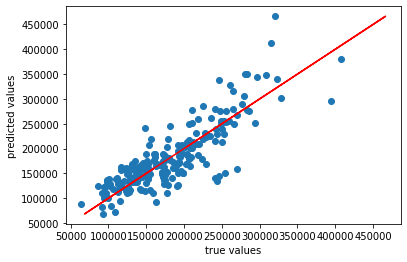

Mean absolute error of the prediction is: 25742.348998639707
Mean squared error of the prediction is: 1267814296.4983647
Root mean squared error of the prediction is: 35606.379997106764
Mean absolute percentage error of the prediction is: 15.197317108716197

***** results for model:  model_3 ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     626.6
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          8.04e-216
Time:                        02:53:58   Log-Likelihood:                -10362.
No. Observations:                 864   AIC:                         2.073e+04
Df Residuals:                     860   BIC:                         2.075e+04
Df Model:                           3                              

In [32]:
model_checker(data2, poss_features)

In [33]:
poss_features

['grlivarea', 'garagearea', 'kitchenqual_TA']

## Exploring interactions

We start with our initial list of features and look for possible interactions.

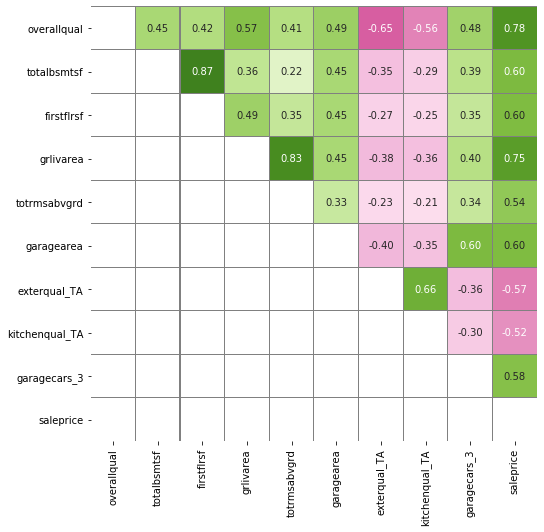

In [34]:
cols = initial_feats + ['saleprice']

matrix = np.tril(data2[cols].corr())

plt.figure(figsize=(8, 8))

ax = sns.heatmap(data2[cols].corr(), annot=True, fmt='.2f', cmap='PiYG',
                 center=0, vmax=1, vmin=-1, cbar = False, mask = matrix, 
                 linecolor='grey', linewidths=0.05)

Let us exclude `overallqual`, and look at interactions between `firstfirsf` and `grlivarea`.

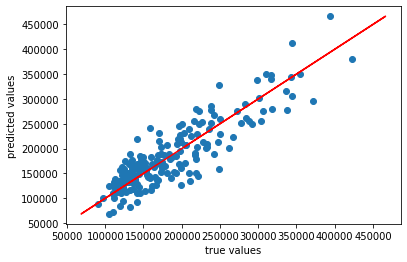

Mean absolute error of the prediction is: 24024.66560901402
Mean squared error of the prediction is: 947903361.4497398
Root mean squared error of the prediction is: 30788.03925958488
Mean absolute percentage error of the prediction is: 13.918603735093512

***** results for model:  interactionv1 ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     399.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          1.76e-264
Time:                        02:53:58   Log-Likelihood:                -10236.
No. Observations:                 864   AIC:                         2.049e+04
Df Residuals:                     856   BIC:                         2.053e+04
Df Model:                           7                           

In [35]:
data2['firstflrsf*grlivarea'] = data2['firstflrsf'] * data2['grlivarea']
poss_features = initial_feats.copy()

poss_features.append('firstflrsf*grlivarea')
poss_features.remove('overallqual')
poss_features.remove('grlivarea')
poss_features.remove('firstflrsf')

model_checker(data2, poss_features, "interactionv1")

We see that the p-value for `totalbsmtsf` is > 0.05, so we remove. We also remove `garagecars_3` to reduce multicollinearity. 

We also interact `exterqual_TA` and `kitchenqual_TA`.

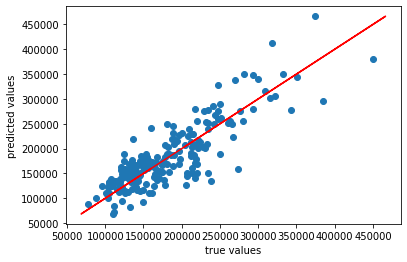

Mean absolute error of the prediction is: 25884.309500804335
Mean squared error of the prediction is: 1168119066.1237566
Root mean squared error of the prediction is: 34177.75689134319
Mean absolute percentage error of the prediction is: 15.17026411955102

***** results for model:  interactionv2 ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     566.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          5.03e-239
Time:                        02:53:59   Log-Likelihood:                -10305.
No. Observations:                 864   AIC:                         2.062e+04
Df Residuals:                     859   BIC:                         2.064e+04
Df Model:                           4                          

In [36]:
data2['exterqual_TA*kitchenqual_TA'] = data2['exterqual_TA'] * data2['kitchenqual_TA']

poss_features.append('exterqual_TA*kitchenqual_TA')
poss_features.remove('exterqual_TA')
poss_features.remove('kitchenqual_TA')
poss_features.remove('totalbsmtsf')
poss_features.remove('garagecars_3')

model_checker(data2, poss_features, "interactionv2")

We remove `totrmsabvgrd` as p-value > 0.05.

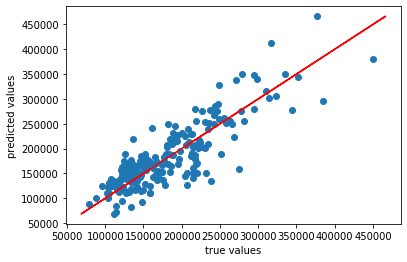

Mean absolute error of the prediction is: 25997.265379578203
Mean squared error of the prediction is: 1172939574.5165586
Root mean squared error of the prediction is: 34248.20542038018
Mean absolute percentage error of the prediction is: 15.228742247249693

***** results for model:  interactionv3 ***** 

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     754.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          3.29e-240
Time:                        02:53:59   Log-Likelihood:                -10306.
No. Observations:                 864   AIC:                         2.062e+04
Df Residuals:                     860   BIC:                         2.064e+04
Df Model:                           3                         

In [37]:
poss_features.remove('totrmsabvgrd')

model_checker(data2, poss_features, "interactionv3")

## Adding Lasso, Ridge and ElasticNet models

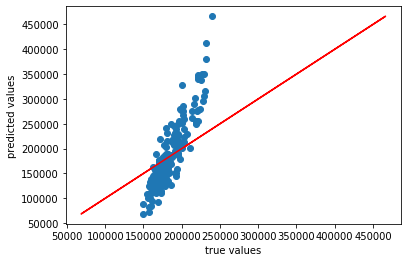

Mean absolute error of the prediction is: 36016.75235939079
Mean squared error of the prediction is: 2334851753.1870537
Root mean squared error of the prediction is: 48320.303736494185
Mean absolute percentage error of the prediction is: 21.296026182706022

{'name': 'ridgcecv1', 'features': ['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'totrmsabvgrd', 'garagearea', 'exterqual_TA', 'kitchenqual_TA', 'garagecars_3'], 'regression_type': 'ridgecv', 'n_features': 9, 'AIC': 0, 'BIC': 0, 'MAE': 36016.75235939079, 'MSE': 2334851753.1870537, 'RMSE': 48320.303736494185, 'MAPE': 21.296026182706022, 'adj_r_squared_train': 0.40093393518710485, 'adj_r_squared_test': 0.4481666340049487, 'alpha_param': 10, 'diff_in_adj_rsquared': 0.047232698817843866}


In [38]:
model_checker(data2, initial_feats, name = "ridgcecv1", reg_type='ridgecv')

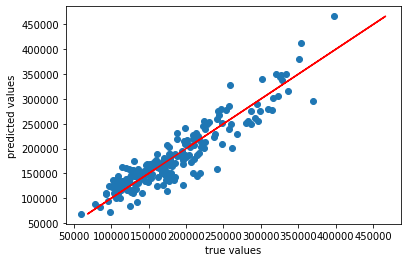

Mean absolute error of the prediction is: 19694.099506155304
Mean squared error of the prediction is: 642986610.0120502
Root mean squared error of the prediction is: 25357.180640048493
Mean absolute percentage error of the prediction is: 11.603799994402609

{'name': 'lassoCVv1', 'features': ['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'totrmsabvgrd', 'garagearea', 'exterqual_TA', 'kitchenqual_TA', 'garagecars_3'], 'regression_type': 'lassocv', 'n_features': 9, 'AIC': 0, 'BIC': 0, 'MAE': 19694.099506155304, 'MSE': 642986610.0120502, 'RMSE': 25357.180640048493, 'MAPE': 11.603799994402609, 'adj_r_squared_train': 0.8206374322523463, 'adj_r_squared_test': 0.8480325507568656, 'alpha_param': 10, 'diff_in_adj_rsquared': 0.027395118504519256}


In [39]:
model_checker(data2, initial_feats, name = "lassoCVv1", reg_type='lassoCV')

## Comparing all linear regression models

In [40]:
lowest_AIC = {'metric': 'AIC', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_BIC = {'metric': 'BIC', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_MAE = {'metric': 'MAE', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_MSE = {'metric': 'MSE', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_RMSE = {'metric': 'RMSE', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_MAPE = {'metric': 'MAPE', 'model': '',
    'regression_type': '', 'value': 10 ** 100}
lowest_diff_in_adj_rsquared = {'metric': "diff_in_adj_rsquared", 'model': '',
    'regression_type': '', 'value': 10 ** 100}
highest_adj_rsquared_train = {'metric': 'adj_r_squared_train',
    'model': '', 'regression_type': '', 'value': -10 ** 100}
highest_adj_rsquared_test = {'metric': 'adj_r_squared_test',
    'model': '', 'regression_type': '', 'value': -10 ** 100}

scores = [lowest_AIC, lowest_BIC, lowest_MAE, lowest_MAPE, lowest_MSE,
          lowest_RMSE, highest_adj_rsquared_train, highest_adj_rsquared_test, lowest_diff_in_adj_rsquared]


def get_best_model(clear_scores = False):
    if clear_scores:
        for metric_dict in scores:
            metric_dict['model'] = ''
            metric_dict['regression_type'] = ''
            
            if metric_dict['metric'] == 'adj_r_squared_train' or metric_dict['metric'] == 'adj_r_squared_test':
                metric_dict['value'] = -10 ** 100
            else:
                metric_dict['value'] = 10 ** 100
    
    for key in all_models.keys():
        for metric_dict in scores:
            metric = metric_dict['metric']

            conditions = (all_models[key][metric] <= metric_dict['value'] and metric != 'adj_r_squared_test'
                          and metric != 'adj_r_squared_train') or (all_models[key][metric] >= metric_dict['value']
                          and metric == 'adj_r_squared_test') or (all_models[key][metric] >= metric_dict['value'] 
                          and metric == 'adj_r_squared_train')

            if conditions and all_models[key][metric] != 0:
                metric_dict['value'] = all_models[key][metric]
                metric_dict['model'] = key
                metric_dict['regression_type'] = all_models[key]['regression_type']

get_best_model()

In [41]:
scores

[{'metric': 'AIC',
  'model': 'model_2',
  'regression_type': 'ols',
  'value': 20256.371713650326},
 {'metric': 'BIC',
  'model': 'model_2',
  'regression_type': 'ols',
  'value': 20294.464295800757},
 {'metric': 'MAE',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 19694.099506155304},
 {'metric': 'MAPE',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 11.603799994402609},
 {'metric': 'MSE',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 642986610.0120502},
 {'metric': 'RMSE',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 25357.180640048493},
 {'metric': 'adj_r_squared_train',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 0.8206374322523463},
 {'metric': 'adj_r_squared_test',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 0.8480325507568656},
 {'metric': 'diff_in_adj_rsquared',
  'model': 'lassoCVv1',
  'regression_type': 'lassocv',
  'value': 0.027395118504519256}

It appears that the best performing models is 'lassoCVv1'. 

In [42]:
all_models['lassoCVv1']

{'name': 'lassoCVv1',
 'features': ['overallqual',
  'totalbsmtsf',
  'firstflrsf',
  'grlivarea',
  'totrmsabvgrd',
  'garagearea',
  'exterqual_TA',
  'kitchenqual_TA',
  'garagecars_3'],
 'regression_type': 'lassocv',
 'n_features': 9,
 'AIC': 0,
 'BIC': 0,
 'MAE': 19694.099506155304,
 'MSE': 642986610.0120502,
 'RMSE': 25357.180640048493,
 'MAPE': 11.603799994402609,
 'adj_r_squared_train': 0.8206374322523463,
 'adj_r_squared_test': 0.8480325507568656,
 'alpha_param': 10,
 'diff_in_adj_rsquared': 0.027395118504519256}

## Fine-tuning LassoCV model

Of the models, "lassoCVv1" seemed to perform the best in most of the model metrics. We now fine-tune the model.

We start out by looking at the performance with all the initial features, without any of the intersections.

### Using only the initial 9 features using the LassoCV regressor

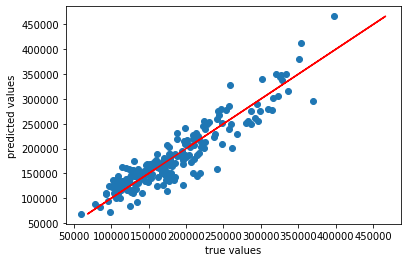

Mean absolute error of the prediction is: 19694.099506155304
Mean squared error of the prediction is: 642986610.0120502
Root mean squared error of the prediction is: 25357.180640048493
Mean absolute percentage error of the prediction is: 11.603799994402609

{'name': 'lassov1_all9', 'features': ['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea', 'totrmsabvgrd', 'garagearea', 'exterqual_TA', 'kitchenqual_TA', 'garagecars_3'], 'regression_type': 'lassocv', 'n_features': 9, 'AIC': 0, 'BIC': 0, 'MAE': 19694.099506155304, 'MSE': 642986610.0120502, 'RMSE': 25357.180640048493, 'MAPE': 11.603799994402609, 'adj_r_squared_train': 0.8206374322523463, 'adj_r_squared_test': 0.8480325507568656, 'alpha_param': 10, 'diff_in_adj_rsquared': 0.027395118504519256}


In [43]:
finalv1 = model_checker(data2, initial_feats, reg_type='lassocv', name = 'lassov1_all9')
finalv1

A feature set of only the intersection terms drops the relevant metrics. We must test to see if a permutation of the initial features and the interaction features improve the score.

### Using only the 3 interaction features using the LassoCV regressor

In [44]:
poss_features

['garagearea', 'firstflrsf*grlivarea', 'exterqual_TA*kitchenqual_TA']

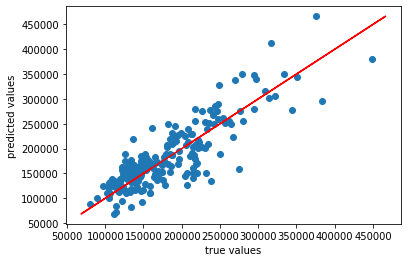

Mean absolute error of the prediction is: 25905.720102326588
Mean squared error of the prediction is: 1168684020.6546664
Root mean squared error of the prediction is: 34186.02083680794
Mean absolute percentage error of the prediction is: 15.168205911030569

{'name': 'lassvo2_only_interaction', 'features': ['garagearea', 'firstflrsf*grlivarea', 'exterqual_TA*kitchenqual_TA'], 'regression_type': 'lassocv', 'n_features': 3, 'AIC': 0, 'BIC': 0, 'MAE': 25905.720102326588, 'MSE': 1168684020.6546664, 'RMSE': 34186.02083680794, 'MAPE': 15.168205911030569, 'adj_r_squared_train': 0.7245204992848222, 'adj_r_squared_test': 0.7237859594202563, 'alpha_param': 10, 'diff_in_adj_rsquared': 0.0007345398645659529}


In [45]:
model_checker(data2, poss_features, reg_type='lassocv', name = "lassvo2_only_interaction")

### Using all unique features (9 initial + 2 interaction features) using the LassoCV regressor

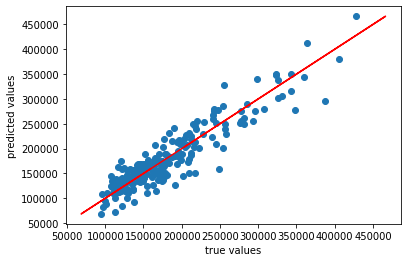

Mean absolute error of the prediction is: 20073.484138920405
Mean squared error of the prediction is: 659946287.6900332
Root mean squared error of the prediction is: 25689.419761645713
Mean absolute percentage error of the prediction is: 11.901223847209657

{'name': 'lassov3_all_feats', 'features': ['exterqual_TA', 'exterqual_TA*kitchenqual_TA', 'firstflrsf', 'firstflrsf*grlivarea', 'garagearea', 'garagecars_3', 'grlivarea', 'kitchenqual_TA', 'overallqual', 'totalbsmtsf', 'totrmsabvgrd'], 'regression_type': 'lassocv', 'n_features': 11, 'AIC': 0, 'BIC': 0, 'MAE': 20073.484138920405, 'MSE': 659946287.6900332, 'RMSE': 25689.419761645713, 'MAPE': 11.901223847209657, 'adj_r_squared_train': 0.8404610117810684, 'adj_r_squared_test': 0.8440241951914822, 'alpha_param': 10, 'diff_in_adj_rsquared': 0.0035631834104138393}


In [46]:
all_poss_features = poss_features.copy() + initial_feats.copy()
all_poss_features = list(np.unique(all_poss_features))

model_checker(data2, all_poss_features, reg_type='lassocv', name = "lassov3_all_feats")

We see that models `lassov1_all9` and `lassov3_all_feats` have comparable scores. 

In [47]:
all_models["lassov1_all9"]['adj_r_squared_train'], all_models["lassov1_all9"]['adj_r_squared_test']


(0.8206374322523463, 0.8480325507568656)

In [48]:
all_models["lassov3_all_feats"]['adj_r_squared_train'], all_models["lassov3_all_feats"]['adj_r_squared_test']


(0.8404610117810684, 0.8440241951914822)

### Isolating ideal feature set by creating models on every combination of the feature-set with more than 5+ elements

In [49]:
import itertools

all_fsets = []

for f_set in range(1, len(all_poss_features)):
    all_fsets.extend(list(itertools.combinations(all_poss_features, r = f_set)))
    
all_fsets = [l for l in all_fsets if len(l) >= 5]
np.random.shuffle(all_fsets)

len(all_fsets)

1485

In [50]:
#all_models = dict()

for index, f_set in enumerate(all_fsets):
    
    for reg_type in ['ols', 'ridgecv', 'lassocv', 'elasticnetcv']:
        model_checker(data2, list(f_set), reg_type=reg_type, show_plot=False)
    
    if index * 4 % 100 == 0 and index > 0:
        print("{} new models added and scored. ".format(index * 4))

get_best_model(clear_scores=False)
scores

100 new models added and scored. 
200 new models added and scored. 
300 new models added and scored. 
400 new models added and scored. 
500 new models added and scored. 
600 new models added and scored. 
700 new models added and scored. 
800 new models added and scored. 
900 new models added and scored. 
1000 new models added and scored. 
1100 new models added and scored. 
1200 new models added and scored. 
1300 new models added and scored. 
1400 new models added and scored. 
1500 new models added and scored. 
1600 new models added and scored. 
1700 new models added and scored. 
1800 new models added and scored. 
1900 new models added and scored. 
2000 new models added and scored. 
2100 new models added and scored. 
2200 new models added and scored. 
2300 new models added and scored. 
2400 new models added and scored. 
2500 new models added and scored. 
2600 new models added and scored. 
2700 new models added and scored. 
2800 new models added and scored. 
2900 new models added and sco

[{'metric': 'AIC',
  'model': 'model_2264',
  'regression_type': 'ols',
  'value': 20153.437409813247},
 {'metric': 'BIC',
  'model': 'model_2264',
  'regression_type': 'ols',
  'value': 20196.291564732484},
 {'metric': 'MAE',
  'model': 'model_3182',
  'regression_type': 'lassocv',
  'value': 19426.320140551914},
 {'metric': 'MAPE',
  'model': 'model_2634',
  'regression_type': 'lassocv',
  'value': 11.330910908430557},
 {'metric': 'MSE',
  'model': 'model_4186',
  'regression_type': 'lassocv',
  'value': 632589180.6157653},
 {'metric': 'RMSE',
  'model': 'model_4186',
  'regression_type': 'lassocv',
  'value': 25151.32562342918},
 {'metric': 'adj_r_squared_train',
  'model': 'model_1738',
  'regression_type': 'lassocv',
  'value': 0.8404634589577646},
 {'metric': 'adj_r_squared_test',
  'model': 'model_4186',
  'regression_type': 'lassocv',
  'value': 0.8504899438027478},
 {'metric': 'diff_in_adj_rsquared',
  'model': 'model_1670',
  'regression_type': 'lassocv',
  'value': 7.3694088

In [51]:
all_models_df = pd.DataFrame.from_dict(data = all_models, orient='index')

In [62]:
all_models_df.columns

Index(['name', 'features', 'regression_type', 'n_features', 'AIC', 'BIC',
       'MAE', 'MSE', 'RMSE', 'MAPE', 'adj_r_squared_train',
       'adj_r_squared_test', 'alpha_param', 'diff_in_adj_rsquared'],
      dtype='object')

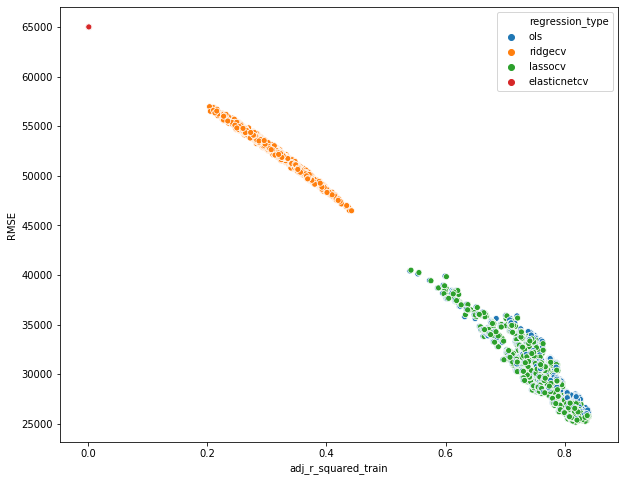

In [69]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = all_models_df, x = 'adj_r_squared_train', y = 'RMSE', hue = 'regression_type')
plt.show()